[Stable diffusion VAE encoder/decoder example](https://keras.io/examples/generative/finetune_stable_diffusion/)

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import keras_cv
import tensorflow as tf
import tensorflow_addons as tfa
from keras_cv.models.stable_diffusion.image_encoder import ImageEncoder
from keras_cv.models.stable_diffusion.decoder import Decoder
from tensorflow import keras

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
keras.mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


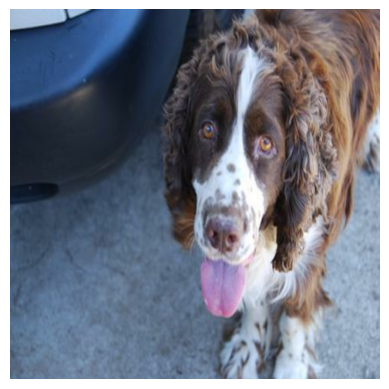

In [20]:
b = tf.io.read_file("imagenette/train/n02102040/ILSVRC2012_val_00000665.JPEG")
x = tf.io.decode_jpeg(b),
x = tf.image.resize(x,(480,480),method='gaussian')
x = np.asarray(x,dtype='uint8')[0]
plt.imshow(x); plt.axis('off');

In [110]:
image_encoder = ImageEncoder(480, 480)
vae = tf.keras.Model(
    image_encoder.input,
    image_encoder.output)

In [139]:
z = vae(tf.expand_dims(x,axis=0))
# z = np.array(z)

[Linear decoding of latents](https://discuss.huggingface.co/t/decoding-latents-to-rgb-without-upscaling/23204)

In [167]:
M = np.array([
    #   R       G       B
    [ 0.298,  0.207,  0.208],  # L1
    [ 0.187,  0.286,  0.173],  # L2
    [-0.158,  0.189,  0.264],  # L3
    [-0.184, -0.271, -0.473],  # L4
])

s = np.shape(z);
z2 = np.zeros((s[0],s[1],s[2],3))
for i_row in range(60):
    for i_col in range(60):
        y1 = np.array(z[0,i_row,i_col])
        z2[0,i_row,i_col,0] = np.dot(y1,M[:,0])
        z2[0,i_row,i_col,1] = np.dot(y1,M[:,1])
        z2[0,i_row,i_col,2] = np.dot(y1,M[:,2])

In [175]:
z2 = z2 - np.min(z2)
z2 = 255.0*(z2 / np.max(z2))
z2 = tfa.image.equalize(z2)

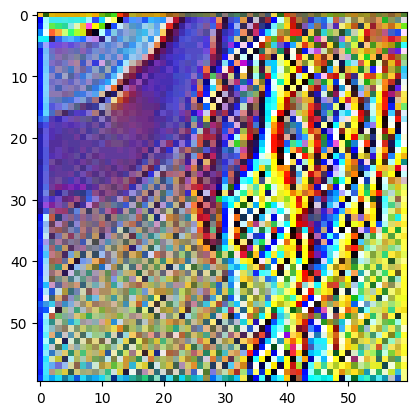

In [176]:
plt.imshow(np.array(z2,dtype='uint8')[0])